In [1]:
import numpy as np
import torch

from train import TrainerDeepSVDD
from preprocess import get_mnist

In [2]:
class Args:

    num_epochs=150
    num_epochs_ae=150
    patience=50
    lr=1e-4
    weight_decay=0.5e-6
    lr_ae=1e-4
    lr_milestones=[50]
    batch_size=200
    pretrain=True
    latent_dim=True
    normal_class=3
    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_mnist(args)

deep_SVDD = TrainerDeepSVDD(args, data, device)

if args.pretrain:
    deep_SVDD.pretrain()

Pretraining Autoencoder... Epoch: 0, Loss: 0.221
Pretraining Autoencoder... Epoch: 1, Loss: 0.183
Pretraining Autoencoder... Epoch: 2, Loss: 0.151
Pretraining Autoencoder... Epoch: 3, Loss: 0.124
Pretraining Autoencoder... Epoch: 4, Loss: 0.104
Pretraining Autoencoder... Epoch: 5, Loss: 0.091
Pretraining Autoencoder... Epoch: 6, Loss: 0.083
Pretraining Autoencoder... Epoch: 7, Loss: 0.076
Pretraining Autoencoder... Epoch: 8, Loss: 0.072
Pretraining Autoencoder... Epoch: 9, Loss: 0.068
Pretraining Autoencoder... Epoch: 10, Loss: 0.065
Pretraining Autoencoder... Epoch: 11, Loss: 0.063
Pretraining Autoencoder... Epoch: 12, Loss: 0.061
Pretraining Autoencoder... Epoch: 13, Loss: 0.059
Pretraining Autoencoder... Epoch: 14, Loss: 0.058
Pretraining Autoencoder... Epoch: 15, Loss: 0.057
Pretraining Autoencoder... Epoch: 16, Loss: 0.055
Pretraining Autoencoder... Epoch: 17, Loss: 0.054
Pretraining Autoencoder... Epoch: 18, Loss: 0.053
Pretraining Autoencoder... Epoch: 19, Loss: 0.052
Pretrainin

In [3]:
deep_SVDD.train()

/home/ec2-user/Deep-SVDD/train.py:99: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([200, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(z, c, reduction='mean')
/home/ec2-user/Deep-SVDD/train.py:99: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([131, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(z, c, reduction='mean')


Training Deep SVDD... Epoch: 0, Loss: 0.041
Training Deep SVDD... Epoch: 1, Loss: 0.019
Training Deep SVDD... Epoch: 2, Loss: 0.011
Training Deep SVDD... Epoch: 3, Loss: 0.007
Training Deep SVDD... Epoch: 4, Loss: 0.005
Training Deep SVDD... Epoch: 5, Loss: 0.004
Training Deep SVDD... Epoch: 6, Loss: 0.003
Training Deep SVDD... Epoch: 7, Loss: 0.002
Training Deep SVDD... Epoch: 8, Loss: 0.002
Training Deep SVDD... Epoch: 9, Loss: 0.002
Training Deep SVDD... Epoch: 10, Loss: 0.001
Training Deep SVDD... Epoch: 11, Loss: 0.001
Training Deep SVDD... Epoch: 12, Loss: 0.001
Training Deep SVDD... Epoch: 13, Loss: 0.001
Training Deep SVDD... Epoch: 14, Loss: 0.001
Training Deep SVDD... Epoch: 15, Loss: 0.001
Training Deep SVDD... Epoch: 16, Loss: 0.001
Training Deep SVDD... Epoch: 17, Loss: 0.001
Training Deep SVDD... Epoch: 18, Loss: 0.001
Training Deep SVDD... Epoch: 19, Loss: 0.001
Training Deep SVDD... Epoch: 20, Loss: 0.001
Training Deep SVDD... Epoch: 21, Loss: 0.001
Training Deep SVDD..

In [10]:
net = deep_SVDD.net
c = deep_SVDD.c
scores = []
labels = []

net.eval()
with torch.no_grad():
    for x, y in deep_SVDD.test_loader:
        x = x.float().to(device)
        z = net(x)
        dist = torch.sum((z - c) ** 2, dim=1)
        scores.append(dist.detach().cpu())
        labels.append(y.cpu())

In [11]:
scores = torch.cat(scores).numpy()
labels = torch.cat(labels).numpy()

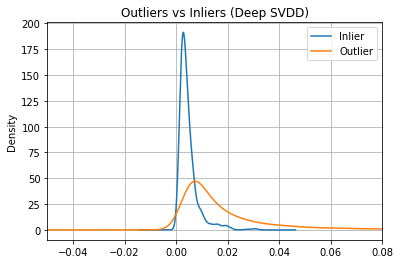

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt


scores_in = scores[np.where(labels==args.normal_class)[0]]
scores_out = scores[np.where(labels!=args.normal_class)[0]]


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
plt.xlim(-0.05, 0.08)
ax.grid(axis='x')
ax.grid(axis='y')

In [7]:
labels[np.where(labels!=args.normal_class)[0]] = 20
labels[np.where(labels==args.normal_class)[0]] = 10
labels[np.where(labels==10)[0]] = 0
labels[np.where(labels==20)[0]] = 1

In [8]:
from sklearn.metrics import roc_auc_score

test_auc = roc_auc_score(labels, scores)
test_auc

0.8698390951442196